<a href="https://colab.research.google.com/github/yasser1dev/Xor_Classifier_From_Scratch/blob/main/MultiLayerNN_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [201]:
class MultiLayerNN:
   
    def __init__(self,epochs,learning_rate):
        self.layers=[]
        self.epochs=epochs
        self.lr=learning_rate
        self.activations={
            'sigmoid':[self.sigmoid,self.sigmoid_derivate],
            'relu':[self.relu,self.relu_derivate]
        }
        self.error=[]
    
    def sigmoid(self,f):
        return 1/(1+np.exp(-f))
    
    def sigmoid_derivate(self,predicted):
        return predicted*(1-predicted)
    
    def relu(self,f):
        for i in range(f.shape[0]):
            for j in range(f.shape[1]):
                if(f[i][j]<0):
                    f[i][j]=0
        return f

    
    def relu_derivate(self,predicted):
        for i in range(predicted.shape[0]):
            for j in range(predicted.shape[1]):
                if(predicted[i][j]<0):
                    predicted[i][j]=0
                if(predicted[i][j]>0):
                    predicted[i][j]=1

        return predicted
    
    def forwardpass(self,X,y):
        samples,features=X.shape
        input_data=X
        for i in range(len(self.layers)):
            layer=self.layers[i]
            layer.input=input_data.dot(layer.weights)+layer.bias
            layer.output=self.activations[layer.activation][0](layer.input)
            input_data=layer.output
        
        return self.layers[-1].output
        
    def backpropagation(self,X,y,y_predicted):
        layer0,layer1=self.layers[0],self.layers[1]
        #======================
        dLoss_predicted=self.Loss_derivate(y,y_predicted)
        dPredicted_input=self.activations[layer1.activation][1](y_predicted)
        delta=dLoss_predicted*dPredicted_input
        output_hidden=self.layers[0].output
        #===============loss hidden

        dLoss_dw_output=output_hidden.T.dot(delta)
        dloss_dbias_out=delta
        #====================================== update

        self.layers[1].weights-=dLoss_dw_output*self.lr
        self.layers[1].bias-=np.sum((dloss_dbias_out*self.lr),axis=0,keepdims=True)
        #======================================
        output_weights=self.layers[1].weights

        dLoss_weights_hidden=X.T.dot(delta.dot(output_weights.T)*self.activations[layer0.activation][1](output_hidden))

        dloss_dbias_h=delta.dot(output_weights.T)*self.activations[layer0.activation][1](output_hidden)
        #======================================== update
        self.layers[0].weights-=dLoss_weights_hidden*self.lr
        self.layers[0].bias-=np.sum((dloss_dbias_h*self.lr),axis=0,keepdims=True)
        
        
    def Loss(self,y,y_predicted):
        return 0.5*(y-y_predicted)**2
    
    def Loss_derivate(self,y,y_predicted):
        return y_predicted-y
        
    def fit(self,X,y):
        for _ in tqdm(range(self.epochs)):
            y_predicted=self.forwardpass(X,y)
            self.error.append(self.binary_cross_entropy(y,y_predicted))
            self.backpropagation(X,y.reshape(-1,1),y_predicted)
            
   
    def binary_cross_entropy(self,y,y_predicted):
        return -(1/len(y))*np.sum(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted))
    
    def predict(self,X):
        input_data=X
        for i in range(len(self.layers)):
            layer=self.layers[i]
            layer.input=input_data.dot(layer.weights)+layer.bias
            layer.output=self.activations[layer.activation][0](layer.input)
            input_data=layer.output
        
        return self.layers[-1].output
        


In [202]:
class Layer:
    def __init__(self,input_size,number_neuron,activation):
        self.weights=np.random.uniform(-1,1,(input_size,number_neuron))
        self.bias=np.random.uniform(-1,1,(1,number_neuron))
        self.input=np.zeros(number_neuron)
        self.output=np.zeros(number_neuron)
        self.activation=activation

In [291]:
model=MultiLayerNN(10000,0.01)

In [292]:
model.layers=[Layer(2,4,"sigmoid"),
              Layer(4,1,"sigmoid")]

In [293]:
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),dtype=int)

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [296]:
model.fit(X_train,y_train)

100%|██████████| 10000/10000 [00:03<00:00, 2739.80it/s]


In [298]:
for i in range(2):
    print("weight : ",model.layers[i].weights," bias : ",model.layers[i].bias)

weight :  [[-3.06965366 -3.25907469  2.14351778  3.28131198]
 [ 2.60014256  3.40684058  2.94958032  3.09037561]]  bias :  [[ 2.94306151 -2.94865646  2.46713858 -2.7908879 ]]
weight :  [[-12.98834276]
 [ 10.96980653]
 [ 12.14258662]
 [-12.35170585]]  bias :  [[1.15506478]]


In [299]:
y_predicted=model.predict(X_test)

In [300]:
y_predicted=[1 if x>=0.5 else 0 for x in y_predicted]

In [301]:
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss,accuracy_score
from mlxtend.plotting import plot_decision_regions

In [302]:
accuracy_score(y_test,y_predicted)

0.9191919191919192

In [303]:
confusion_matrix(y_test,y_predicted)

array([[45,  1],
       [ 7, 46]])

In [304]:
roc_auc_score(y_test,y_predicted)

0.9230926989335522

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'MultiLayerNN')

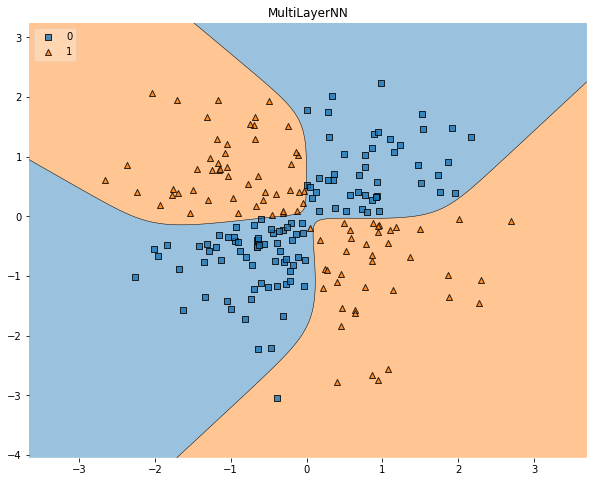

In [305]:
fig = plt.figure(figsize=(10,8)) 
fig = plot_decision_regions(X=X_train, y=y_train, clf=model, legend=2) 
plt.title("MultiLayerNN")